In [146]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import mglearn
import warnings
warnings.filterwarnings("ignore")

In [147]:
#Import audit_risk.csv in to python
audit_risk = pd.read_csv('audit_risk.csv')

In [148]:
#Import trial.csv in to python
trial = pd.read_csv('trial.csv')

In [149]:
print(audit_risk.head())
print(trial.head())

   Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  Risk_B  \
0          3.89          23    4.18      0.6   2.508    2.50      0.2   0.500   
1          3.89           6    0.00      0.2   0.000    4.83      0.2   0.966   
2          3.89           6    0.51      0.2   0.102    0.23      0.2   0.046   
3          3.89           6    0.00      0.2   0.000   10.80      0.6   6.480   
4          3.89           6    0.00      0.2   0.000    0.08      0.2   0.016   

   TOTAL  numbers  ...   RiSk_E  History  Prob  Risk_F  Score  Inherent_Risk  \
0   6.68      5.0  ...      0.4        0   0.2     0.0    2.4          8.574   
1   4.83      5.0  ...      0.4        0   0.2     0.0    2.0          2.554   
2   0.74      5.0  ...      0.4        0   0.2     0.0    2.0          1.548   
3  10.80      6.0  ...      0.4        0   0.2     0.0    4.4         17.530   
4   0.08      5.0  ...      0.4        0   0.2     0.0    2.0          1.416   

   CONTROL_RISK  Detection_Risk 

In [150]:
print(audit_risk.shape)
print(trial.shape)

(776, 27)
(776, 18)


In [151]:
#Check and Remove duplicate rows from data
audit = audit_risk[audit_risk.duplicated() == False]
audit.shape

(763, 27)

In [152]:
#Check and Remove duplicate rows from data
trial = trial[trial.duplicated()  == False]
trial.shape

(763, 18)

In [153]:
audit.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [154]:
sum(audit['Score_B']==audit['Score_B.1'])

510

In [155]:
print(audit.isna().sum())
print(trial.isna().sum())

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64
Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64


In [156]:
#We have one Missing value and we are replacing it with median of data
audit.fillna(audit.median(), inplace=True)
trial.fillna(trial.median(), inplace=True)

In [157]:
#Renaming Risk column of trial data as  Trial_Risk
trial.rename(columns = {'Risk': 'Trial_Risk'},inplace = True)

In [158]:
##Join audit and trial datasets as data

data = audit.join(trial.set_index(['Sector_score', 'LOCATION_ID', 'PARA_A','PARA_B','TOTAL', 'numbers', 'Money_Value',
       'History', 'Score']), on= ['Sector_score', 'LOCATION_ID',  'PARA_A','PARA_B', 'TOTAL', 'numbers', 'Money_Value',
       'History', 'Score']) 

In [159]:
data.shape

(763, 36)

In [160]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'SCORE_A', 'SCORE_B', 'Marks',
       'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score',
       'Trial_Risk'],
      dtype='object')

In [161]:
data = data.drop(['SCORE_A','SCORE_B','District'] , axis=1)

In [162]:
data.shape

(763, 33)

In [163]:
data['Detection_Risk'].value_counts()

0.5    763
Name: Detection_Risk, dtype: int64

In [164]:
#Dropping Detection_risk
data= data.drop(['Detection_Risk'],axis=1)

In [165]:
data['LOCATION_ID'].value_counts()

8          74
19         68
16         51
9          51
12         44
5          43
2          40
4          37
13         35
6          33
15         33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
21          8
28          8
43          7
27          7
25          6
20          5
38          4
7           4
36          4
30          4
3           3
40          3
35          2
17          1
SAFIDON     1
44          1
23          1
34          1
24          1
42          1
41          1
NUH         1
33          1
LOHARU      1
Name: LOCATION_ID, dtype: int64

In [166]:
#Deleting the anomalies of LOCATION_ID., to make the data homogenoeus 
indexNames = data[ data['LOCATION_ID'] == 'NUH'].index
data.drop(indexNames,inplace = True)

In [167]:
indexNames = data[ data['LOCATION_ID'] == 'SAFIDON'].index
data.drop(indexNames,inplace = True)

In [168]:
indexNames = data[ data['LOCATION_ID'] == 'LOHARU'].index
data.drop(indexNames,inplace = True)

In [169]:
data.isnull().sum().sort_values(ascending=False)

Trial_Risk       0
History_score    0
LOCATION_ID      0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B          0
Risk_B           0
TOTAL            0
numbers          0
Score_B.1        0
Risk_C           0
Money_Value      0
Score_MV         0
Risk_D           0
District_Loss    0
PROB             0
RiSk_E           0
History          0
Prob             0
Risk_F           0
Score            0
Inherent_Risk    0
CONTROL_RISK     0
Audit_Risk       0
Risk             0
Marks            0
MONEY_Marks      0
Loss             0
LOSS_SCORE       0
Sector_score     0
dtype: int64

In [170]:
#Duplicating the data to use for classification exercises
data_cls = data

# Data Processing for Regression

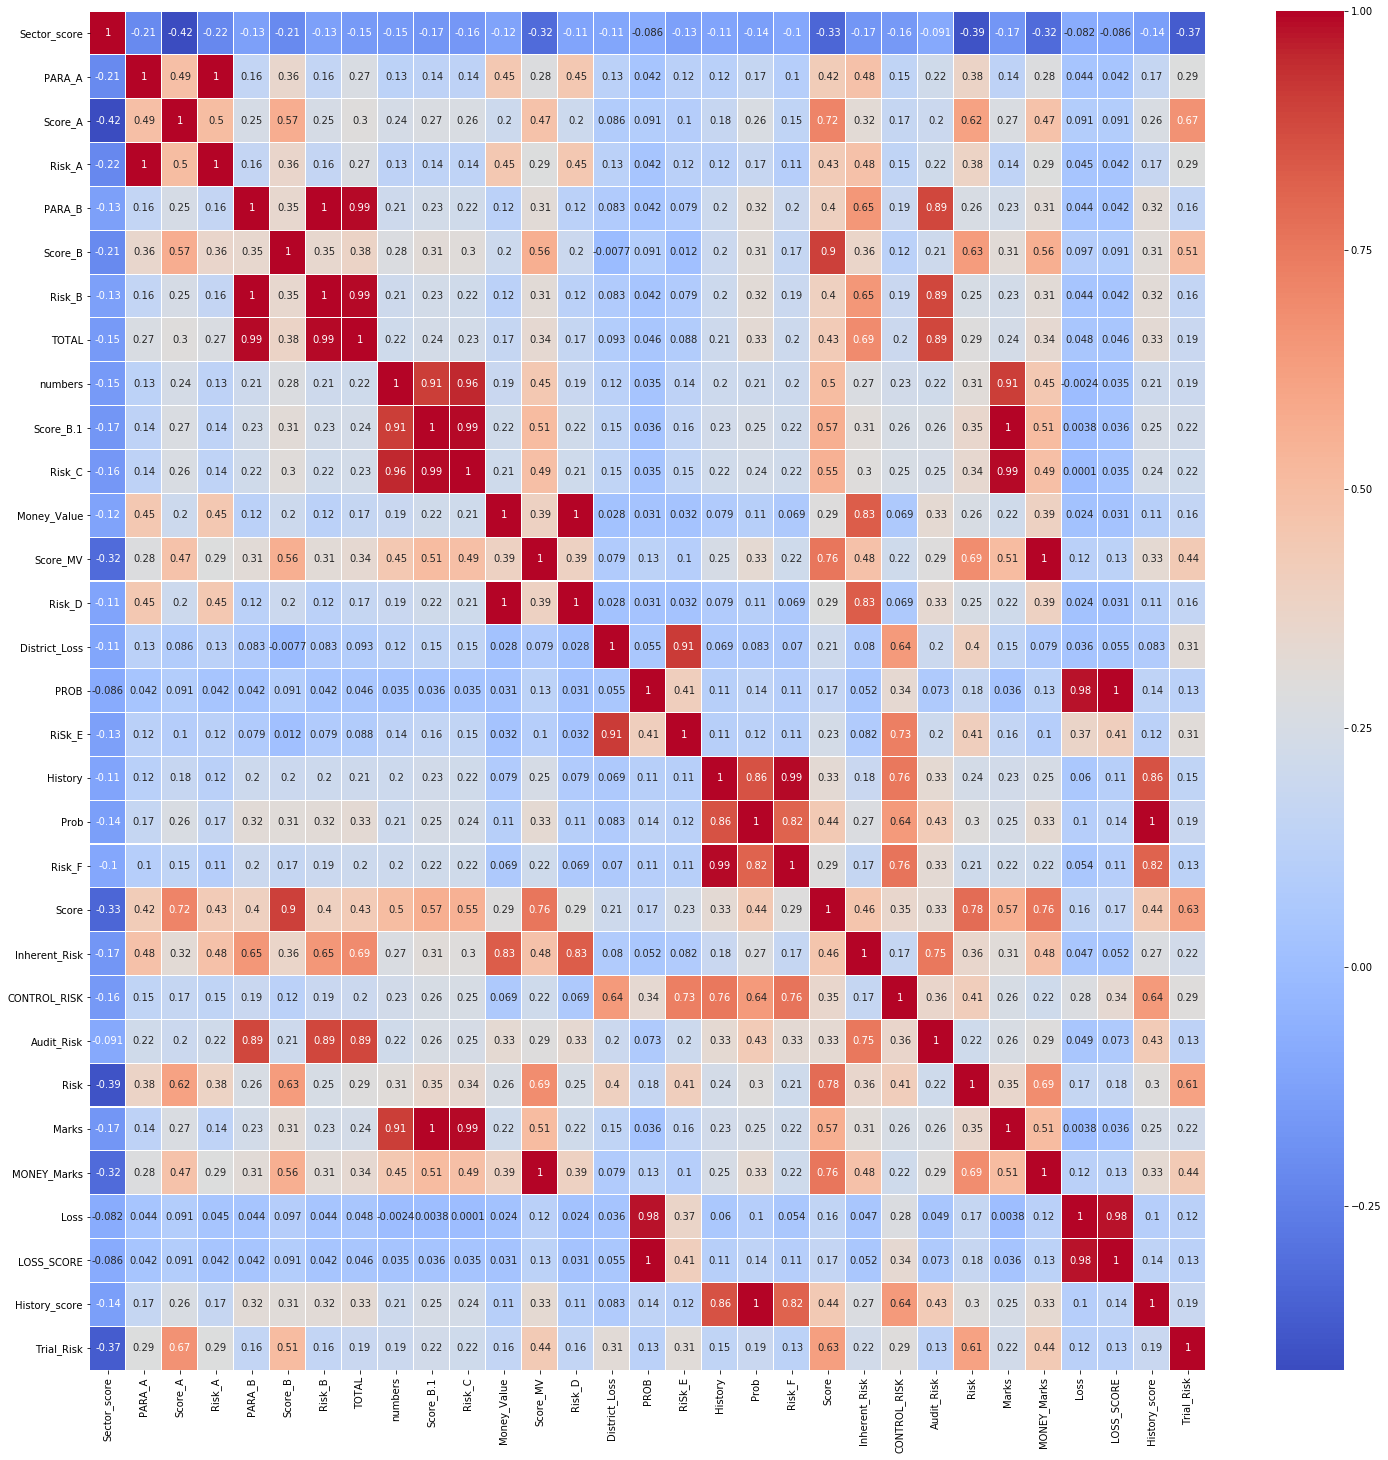

In [171]:
dc = data.corr()
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(dc,annot=True,cmap='coolwarm',linewidths=0.1, ax=ax)

In [172]:
#Removing exact collinarity from data

data=data.drop(['Risk_A','Risk_B','Risk_C','Risk_D','RiSk_E','Risk_F','Loss','History_score','MONEY_Marks','Score_B.1','PROB','PARA_B'],axis=1)

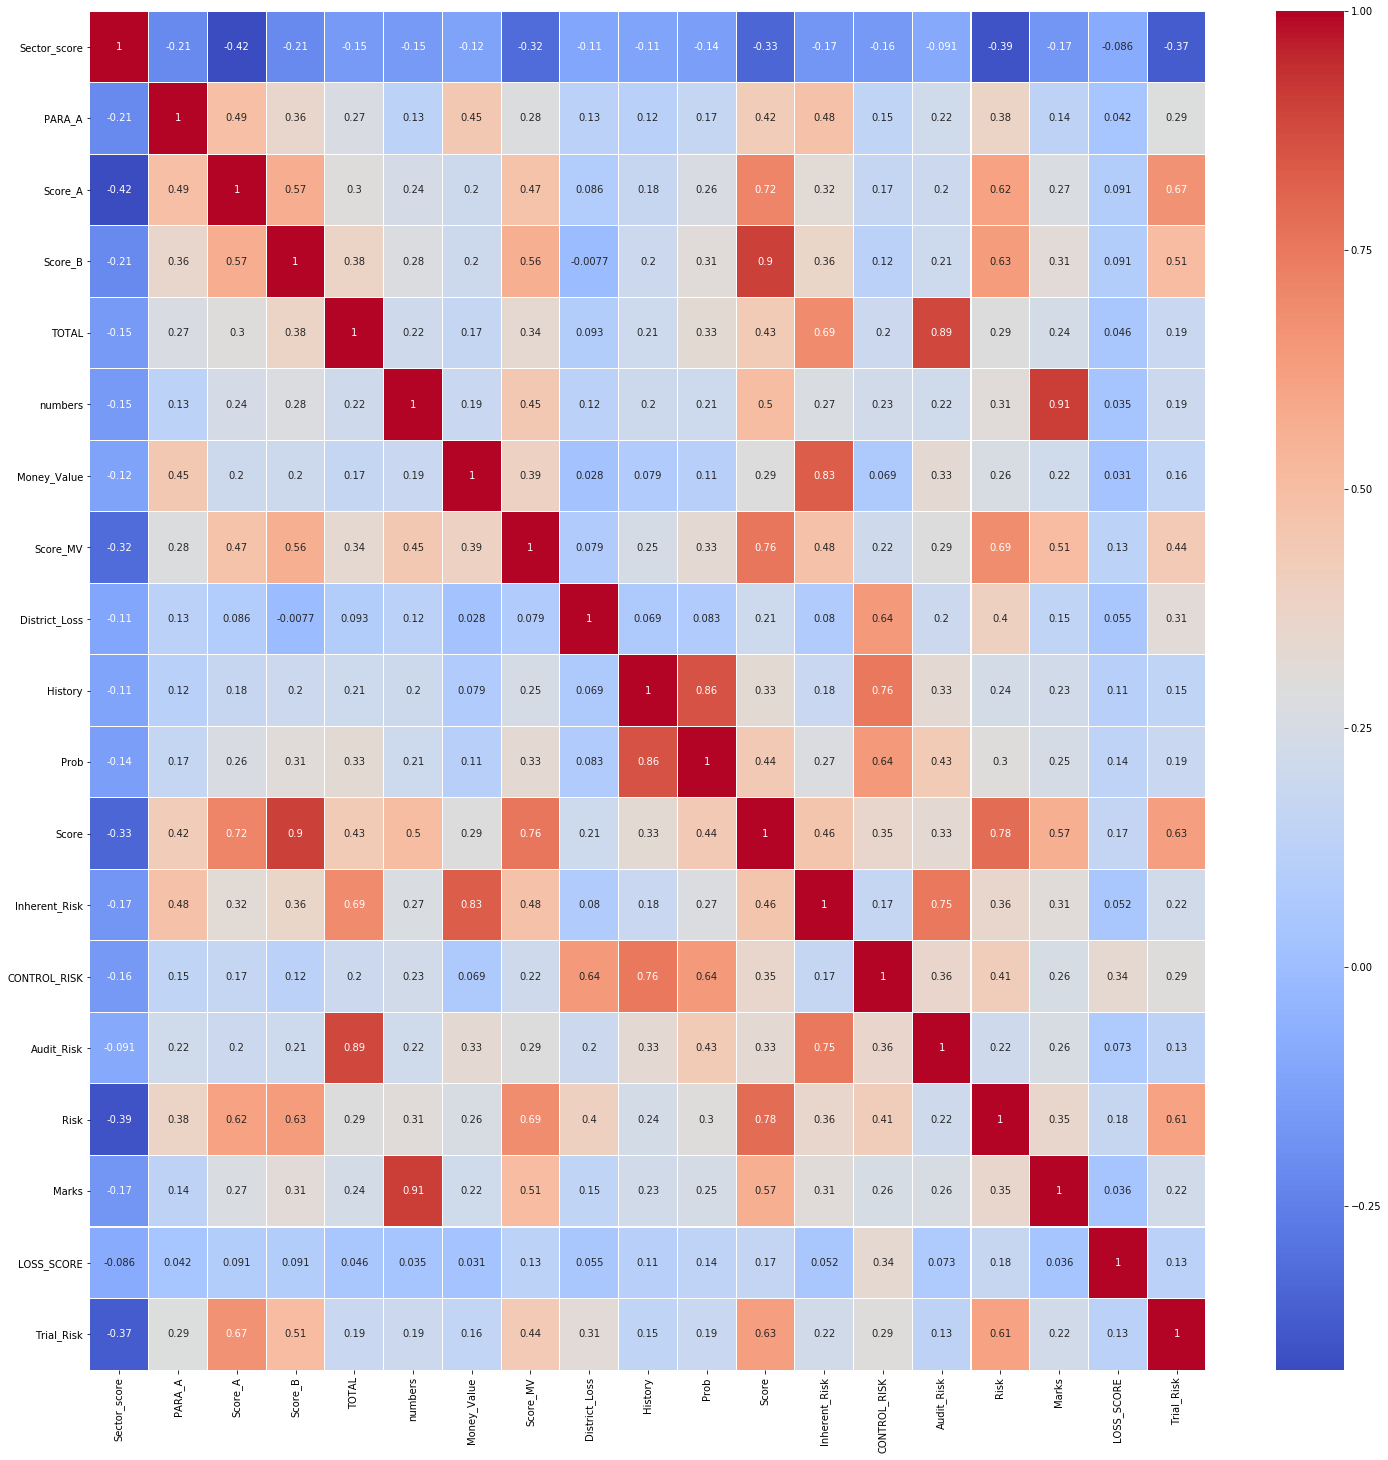

In [173]:
#Checking Correlation after removing exact collinearity

dc = data.corr()
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(dc,annot=True,cmap='coolwarm',linewidths=0.1, ax=ax)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 20 columns):
Sector_score     760 non-null float64
LOCATION_ID      760 non-null object
PARA_A           760 non-null float64
Score_A          760 non-null float64
Score_B          760 non-null float64
TOTAL            760 non-null float64
numbers          760 non-null float64
Money_Value      760 non-null float64
Score_MV         760 non-null float64
District_Loss    760 non-null int64
History          760 non-null int64
Prob             760 non-null float64
Score            760 non-null float64
Inherent_Risk    760 non-null float64
CONTROL_RISK     760 non-null float64
Audit_Risk       760 non-null float64
Risk             760 non-null int64
Marks            760 non-null int64
LOSS_SCORE       760 non-null int64
Trial_Risk       760 non-null int64
dtypes: float64(13), int64(6), object(1)
memory usage: 124.7+ KB


In [175]:
#Changing data type of LOCATION_ID from object to float
data['LOCATION_ID']=data['LOCATION_ID'].astype(float)

In [176]:
#Removing outliers with 3sigma rule

data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data.shape

(701, 20)

In [177]:
#Transforming District_Loss as dummy column

cols = pd.get_dummies(data['District_Loss'],drop_first = "True")
data[cols.columns] = cols
data.drop(['District_Loss'], axis = 1, inplace=True)
data.rename(columns = {4: 'District_4',6:'District_6' },inplace = True)

In [178]:
#Selecting our features and target variables

X = data.drop(['Audit_Risk','Risk','Trial_Risk'],axis = 1 )
y = data['Audit_Risk']

In [179]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     701 non-null float64
LOCATION_ID      701 non-null float64
PARA_A           701 non-null float64
Score_A          701 non-null float64
Score_B          701 non-null float64
TOTAL            701 non-null float64
numbers          701 non-null float64
Money_Value      701 non-null float64
Score_MV         701 non-null float64
History          701 non-null int64
Prob             701 non-null float64
Score            701 non-null float64
Inherent_Risk    701 non-null float64
CONTROL_RISK     701 non-null float64
Marks            701 non-null int64
LOSS_SCORE       701 non-null int64
District_4       701 non-null uint8
District_6       701 non-null uint8
dtypes: float64(13), int64(3), uint8(2)
memory usage: 94.5 KB


In [180]:
#Split the data into train and test dataset (80% - train and 20% - test)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


# Regression

# 1. Linear Regression

In [181]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.8881843659334517
0.8970086772152325


In [182]:
model_1 = smf.OLS(y, X).fit()
predictions = model_1.predict(X) 
print(model_1.summary()) 
 

                            OLS Regression Results                            
Dep. Variable:             Audit_Risk   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     428.4
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          5.08e-319
Time:                        22:59:58   Log-Likelihood:                -1589.6
No. Observations:                 701   AIC:                             3207.
Df Residuals:                     687   BIC:                             3271.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Sector_score      0.0125      0.004      3.022

In [183]:
#Removing Insignificant Variables

X = data.drop(['Audit_Risk','Risk','Trial_Risk','LOCATION_ID','PARA_A','TOTAL','Money_Value'],axis = 1 )
y = data['Audit_Risk']

In [184]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [185]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.8897428862557997
0.8769552498556283


In [186]:
model_2 = smf.OLS(y, X).fit()
predictions = model_2.predict(X) 
print(model_2.summary())

#We got better AIC and BIC values

                            OLS Regression Results                            
Dep. Variable:             Audit_Risk   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     619.2
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          9.88e-324
Time:                        22:59:58   Log-Likelihood:                -1591.2
No. Observations:                 701   AIC:                             3202.
Df Residuals:                     691   BIC:                             3248.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Sector_score      0.0130      0.004      3.202

In [187]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [188]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Best cross-validation score: 0.87


In [189]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy_X,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.002327,0.000470,0.000997,6.939669e-07,True,True,True,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.847506,0.948751,...,0.037278,7,0.893387,0.866746,0.891861,0.894086,0.892367,0.898373,0.889470,0.010379
1,0.002326,0.000470,0.000831,6.853902e-04,True,True,False,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.847614,0.953184,...,0.038788,5,0.893404,0.874167,0.892193,0.894094,0.892406,0.898125,0.890732,0.007664
2,0.001827,0.000678,0.000831,3.716742e-04,True,False,True,"{'copy_X': True, 'fit_intercept': False, 'norm...",0.847614,0.953184,...,0.038788,1,0.893404,0.874167,0.892193,0.894094,0.892406,0.898125,0.890732,0.007664
3,0.002010,0.000576,0.000999,5.762865e-04,True,False,False,"{'copy_X': True, 'fit_intercept': False, 'norm...",0.847614,0.953184,...,0.038788,1,0.893404,0.874167,0.892193,0.894094,0.892406,0.898125,0.890732,0.007664
4,0.002001,0.000578,0.000991,5.864228e-04,False,True,True,"{'copy_X': False, 'fit_intercept': True, 'norm...",0.847506,0.948751,...,0.037278,7,0.893387,0.866746,0.891861,0.894086,0.892367,0.898373,0.889470,0.010379


In [190]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(lreg , X_train, y_train, cv=kfold)))
scores = cross_val_score(lreg , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.84738218 0.95288906 0.86913641 0.864583   0.87632966 0.83016604]
0.8734143931246722


Text(0.5, 0, 'RM')

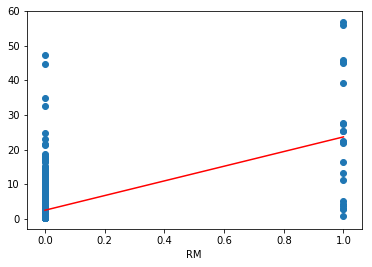

In [191]:
#PLOT

%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

# Summary Linear Regression :

Implemented Linear Regression on the data we prepared., From OLS removed insignificant variables and ran the model again now we got better AIC and BIC values ., so we are considering this new set of data through out the regression.

Best Paramenters of Linear Regression are :{'copy_X': True, 'fit_intercept': False, 'normalize': True}

Average cross-validation score: 0.87
 


# 2. Ridge Regression

In [192]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

<IPython.core.display.Javascript object>


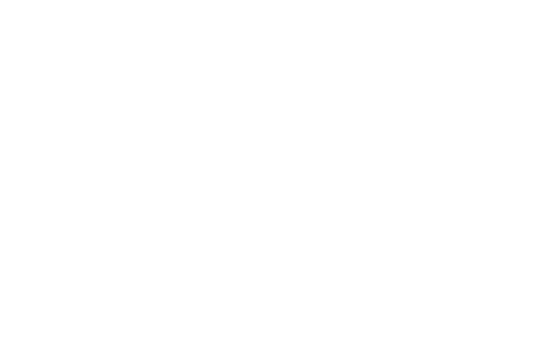

Text(0.5, 0, '$\\alpha$')

<IPython.core.display.Javascript object>


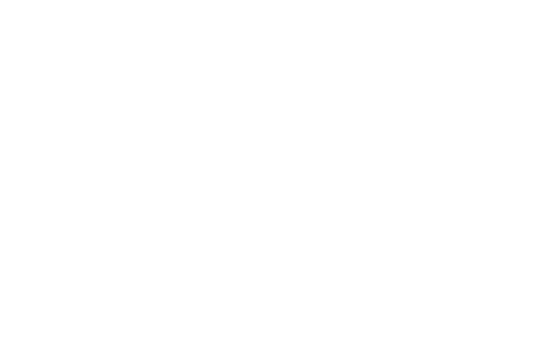

In [193]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')


In [194]:
print(train_score_list)
print(test_score_list)

#alpha =1

[0.8896853791092034, 0.889563142632418, 0.8812875315359381, 0.774097400632051, 0.5596380143039958]
[0.8782732750401469, 0.8800962896859945, 0.8813199670430388, 0.7738871867174165, 0.6815884413402433]


In [195]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8813
Test score: 0.8813


In [196]:
from sklearn.model_selection import GridSearchCV
model = Ridge()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [197]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.87


In [198]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(ridge , X_train, y_train, cv=kfold)))
scores = cross_val_score(ridge , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.80904352 0.94358696 0.82053208 0.8485539  0.87251459 0.88098565]
0.8625361174572578


# Summary of Ridge Regression :

Train score: 0.8813
Test score: 0.8813

Best parameters: {'alpha': 1}

Average cross-validation score: 0.86



# 3. Lasso Regression

In [199]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

<IPython.core.display.Javascript object>


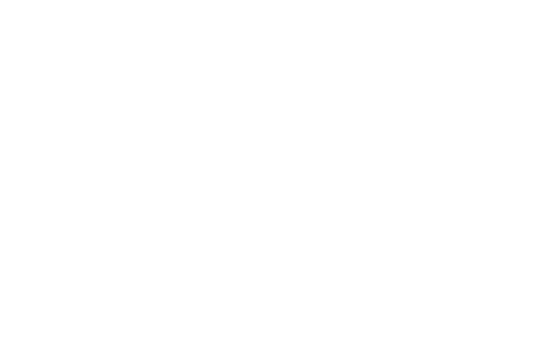

Text(0.5, 0, '$\\alpha$')

<IPython.core.display.Javascript object>


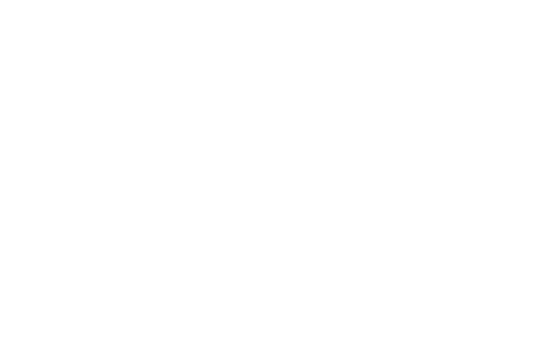

In [200]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')


In [201]:
print(train_score_list)
print(test_score_list)

[0.8891805015916247, 0.8726653010772566, 0.334380113704154, 0.0, 0.0]
[0.8823403200948111, 0.9104137385032406, 0.40744291956375855, -0.01959827132187275, -0.01959827132187275]


In [202]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.8892
Test score: 0.8823


In [203]:
from sklearn.model_selection import GridSearchCV
model = Lasso()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [204]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.87


In [205]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(lasso, X_train, y_train, cv=kfold)))
scores = cross_val_score(lasso , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.84635826 0.95311172 0.86263877 0.86417029 0.87633489 0.83798079]
0.8734324521190366


# Summary of Lasso Regression

Train score: 0.8892
Test score: 0.8823

Best parameters: {'alpha': 0.01}

Best cross-validation score: 0.8734


# 4.KNN Regression

In [206]:
from sklearn.neighbors import KNeighborsRegressor


X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

Text(0, 0.5, 'MSE')

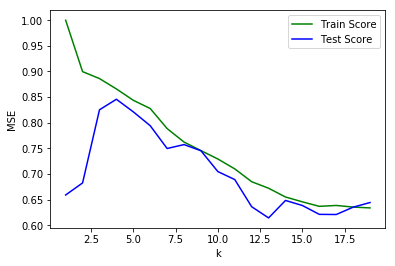

In [207]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [208]:
knn_reg = KNeighborsRegressor(4)
knn_reg.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn_reg.score(X_train, y_train)))
print('test score: {:.4f}'.format(knn_reg.score(X_test, y_test)))

Train score: 0.8660
test score: 0.8458


In [209]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsRegressor()
k_range = list(range(1, 21))
parameters = dict(n_neighbors=k_range)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [210]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.78


In [211]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
knn  = KNeighborsRegressor(4)  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.49775329 0.91539111 0.74342135 0.71044307 0.75084728 0.7669041 ]
0.7307933673445421


# Summary for Knn Regression

Train score: 0.8660
test score: 0.8458
    
Normal Test score , Train Score Plot suggesting numbers of neighbors as 4  , but Grid search cv suggesting 

Best parameters: {'n_neighbors': 5}

Best cross-validation score: 0.73

# 5 .Polynomial Regression

In [212]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(0,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [213]:
print(train_score_list)
print(test_score_list)

[0.0, 0.8896968732237565, 1.0]
[-0.01959827132187275, 0.8782508438754416, 1.0]


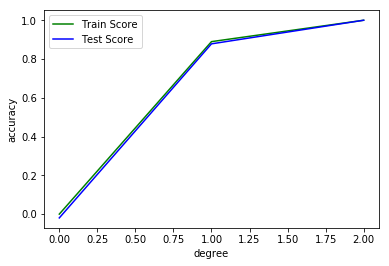

In [214]:
%matplotlib inline

x_axis = range(0,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

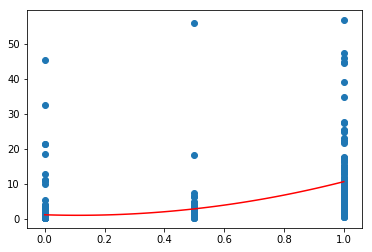

In [215]:
poly = PolynomialFeatures(n)
X_train_1 = X_train[:,2].reshape(-1,1)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)


plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

# summary for polynomial regression

Train score : 0.88
test score : 0.87

Best Parameter : Degree = 2


# 6.SGD REGRESSOR

In [216]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [217]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

0.8896753423839886
0.8766761695306768


In [218]:
sgd_reg1 = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l1')
sgd_reg1.fit(X_train, y_train)
print(sgd_reg1.score(X_train, y_train))
print(sgd_reg1.score(X_test, y_test))

0.8896801271909434
0.876911317323431


In [219]:
from sklearn.model_selection import GridSearchCV

model = SGDRegressor()
param_grid = [{'alpha' : 10.0**-np.arange(1,5),'l1_ratio':[0, .05, .5,.9, .95, .99, 1],'penalty':['l1','l2']}]



grid_search = GridSearchCV(model, param_grid,cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([0.1   , 0.01  , 0.001 , 0.0001]), 'l1_ratio': [0, 0.05, 0.5, 0.9, 0.95, 0.99, 1], 'penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [220]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'alpha': 0.0001, 'l1_ratio': 0.9, 'penalty': 'l1'}


In [221]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(sgd_reg1 , X_train, y_train, cv=kfold)))
scores = cross_val_score(sgd_reg1 , X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.84824604 0.95316836 0.86864642 0.86481149 0.8760161  0.82988464]
0.8734621733468191


# summary SGDRegression :

Train score : 0.8896753423839886
Test score : 0.8766761695306768

Best parameters: penality :l2

cross validation score : 0.87

# 7.Linear Svm

In [222]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [223]:
from sklearn.svm import SVR

train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svr = SVR(kernel = 'linear', C = C)
        
        #train the model
        svr.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svr.score(X_train, y_train))
        test.append(svr.score(X_test, y_test))
        index.append(C)

([<matplotlib.axis.XTick at 0x2226cb83278>,
 <a list of 6 Text xticklabel objects>)

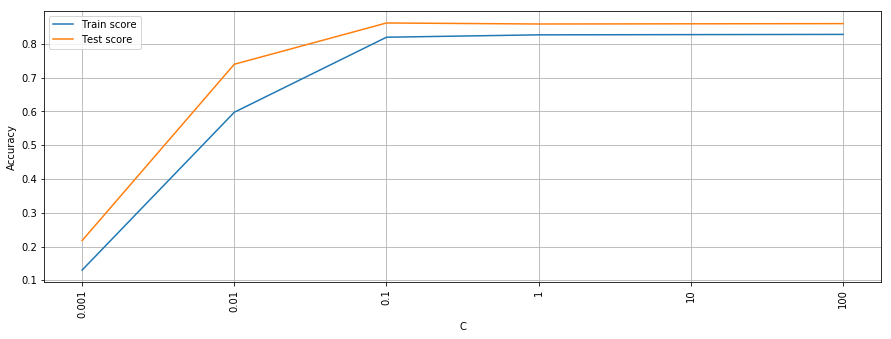

In [224]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(range(len(index)), train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.legend()
plt.grid()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xticks(range(len(index)), index, rotation = 90)

In [225]:
svr = SVR(kernel = 'linear',C = 1)
        
        #train the model
svr.fit(X_train, y_train)
        
        #evaluate the model
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.8267075232415888
0.8588320157192862


In [226]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr , X_train, y_train, cv=kfold)))
scores = cross_val_score(svr , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.7750847  0.9280578  0.76054404 0.77577949 0.82479684 0.83374677]
0.8163349412600879


# Sumary Linear Svm

Train Score :0.8267075232415888
Test Score : 0.8588320157192862
    
Best parameters: {'C': 1}

Cross-validation scores: 0.81  

# 8.SVR with kernel

In [227]:
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [228]:
from sklearn.svm import SVR

train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
    for gamma in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svr = SVR(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svr.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svr.score(X_train, y_train))
        test.append(svr.score(X_test, y_test))
        index.append((C,gamma))

([<matplotlib.axis.XTick at 0x2226cbf3c88>,
 <a list of 36 Text xticklabel objects>)

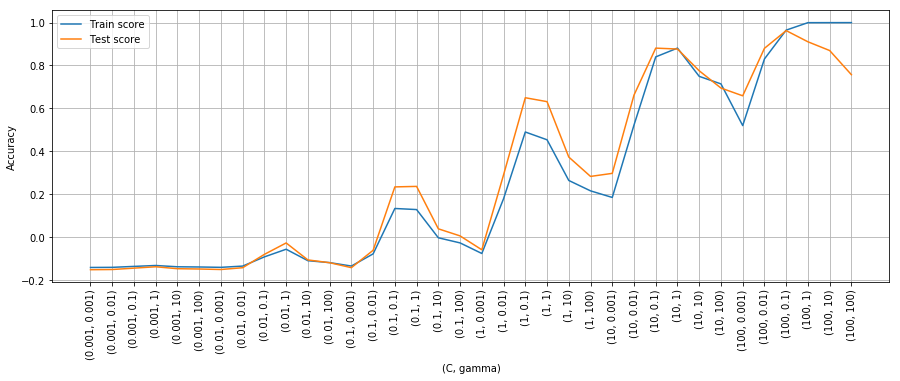

In [229]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(range(len(index)), train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.legend()
plt.grid()
plt.xlabel('(C, gamma)')
plt.ylabel('Accuracy')
plt.xticks(range(len(index)), index, rotation = 90)

In [230]:
svr = SVR(kernel = 'rbf', C = 100, gamma = 0.1)
        
        #train the model
svr.fit(X_train, y_train)
        
        #evaluate the model
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.9647193505792745
0.9624000831404774


In [231]:
from sklearn.model_selection import GridSearchCV
model = SVR()
parameters = param_grid = {'kernel':['rbf'],'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model,parameters, cv=6,scoring='neg_mean_squared_error',verbose=3)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

Fitting 6 folds for each of 36 candidates, totalling 216 fits
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=-40.83476473457555, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=-73.61715851771471, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=-67.98925164356162, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=-62.42466419290468, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=-68.99441662938045, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=-73.32378906638903, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.001, gamma=0.01, kernel=rbf, score=-73.44537969197907, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.1, kernel=rbf, score=-40.87201353352242, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.1, kernel=rbf, score=-73.65768923674185, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.1, kernel=rbf, score=-68.01394072907436, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.1, kernel=rbf, score=-62.47302726338978, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.1, kernel=rbf, score=-69.11398602060183, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.1, kernel=rbf, score=-73.43812107578135, total=   0.0s
[CV] C=0.001, gamma=1, kern

[CV]  C=0.01, gamma=100, kernel=rbf, score=-73.57746518806483, total=   0.0s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV]  C=0.01, gamma=100, kernel=rbf, score=-67.92827974097895, total=   0.0s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV]  C=0.01, gamma=100, kernel=rbf, score=-62.41221529798764, total=   0.0s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV]  C=0.01, gamma=100, kernel=rbf, score=-68.97322195609668, total=   0.0s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV]  C=0.01, gamma=100, kernel=rbf, score=-73.30208261391887, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=-26.561791098395943, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=-48.53740540546341, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=

[CV]  C=1, gamma=1, kernel=rbf, score=-47.24978220644629, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=-52.62630356816062, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=-54.305418645674095, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV]  C=1, gamma=10, kernel=rbf, score=-34.3423278725674, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV]  C=1, gamma=10, kernel=rbf, score=-64.57393063886099, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV]  C=1, gamma=10, kernel=rbf, score=-60.86748345559697, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV]  C=1, gamma=10, kernel=rbf, score=-54.54590922315898, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf ...................................

[CV]  C=100, gamma=0.1, kernel=rbf, score=-11.423882758882531, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=-6.586372537385459, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=-13.43200317732709, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=-14.669248999178878, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=-11.626905072115987, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=-9.848550235744806, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=-19.513927436774495, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ........

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    4.3s finished


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [232]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [233]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr , X_train, y_train, cv=kfold)))
scores = cross_val_score(svr , X_train, y_train, cv=kfold)

print(np.mean(scores))


Cross-validation scores:
[0.84225925 0.97830607 0.89066483 0.8892346  0.9676193  0.93224185]
0.9167209827565985


# Summary Svm with kernel

Train Score:0.9647193505792745

Test Score: 0.9624000831404774

Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Cross Validation Score : 0.92    

# SUMMARY OF REGRESSION MODELS

Based on Test scores and cross validation scores SVM with Kernal (rbf) has the better values., So Svm with Kernel is the best model on this Data.



In [234]:
svr = SVR(kernel = 'rbf', C = 100, gamma = 0.1)
svr.fit(X_train, y_train)
ypred = svr.predict(X_test)

In [235]:
#predicted audit_Risk Values
ypred

array([-8.39866077e-02,  1.41451713e-02,  3.25356721e-02,  1.45249424e-01,
       -6.51538400e-02, -6.79042117e-02,  4.84532429e-02,  1.13546413e+00,
        2.08346220e+01, -5.92729837e-02,  1.60533658e-01,  6.46022827e-02,
       -4.99644762e-02,  9.32818694e-01,  1.48524360e-02,  2.81097134e-01,
        3.80385197e+00,  1.35035510e-01,  5.82596225e-02, -7.33711703e-02,
        2.25303569e+00, -9.42902977e-02,  8.08911361e-01, -7.94794319e-02,
       -1.06307299e-01,  6.82652866e-02, -5.03316418e-02,  5.64422337e-02,
        1.33599250e-01,  9.91335256e+00,  7.39284842e-01, -3.66308990e-02,
        1.66206196e-02,  6.72038286e-02,  8.58796626e-01, -5.72879717e-02,
        6.68500117e-02, -4.07572566e-02,  4.48645087e-02,  5.92017602e-02,
        3.57982122e+00,  1.60702184e-01,  2.31006786e+00,  7.63306004e+00,
       -7.18891231e-02, -4.84523646e-02,  5.15326953e-02, -6.06394168e-02,
       -7.20206930e-02,  3.11896562e-02,  9.11592354e-01,  2.13787548e+01,
       -2.33336952e-02, -

# Data Preperation for Classification

In [236]:
print(data_cls.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 32 columns):
Sector_score     760 non-null float64
LOCATION_ID      760 non-null object
PARA_A           760 non-null float64
Score_A          760 non-null float64
Risk_A           760 non-null float64
PARA_B           760 non-null float64
Score_B          760 non-null float64
Risk_B           760 non-null float64
TOTAL            760 non-null float64
numbers          760 non-null float64
Score_B.1        760 non-null float64
Risk_C           760 non-null float64
Money_Value      760 non-null float64
Score_MV         760 non-null float64
Risk_D           760 non-null float64
District_Loss    760 non-null int64
PROB             760 non-null float64
RiSk_E           760 non-null float64
History          760 non-null int64
Prob             760 non-null float64
Risk_F           760 non-null float64
Score            760 non-null float64
Inherent_Risk    760 non-null float64
CONTROL_RISK     760 non-n

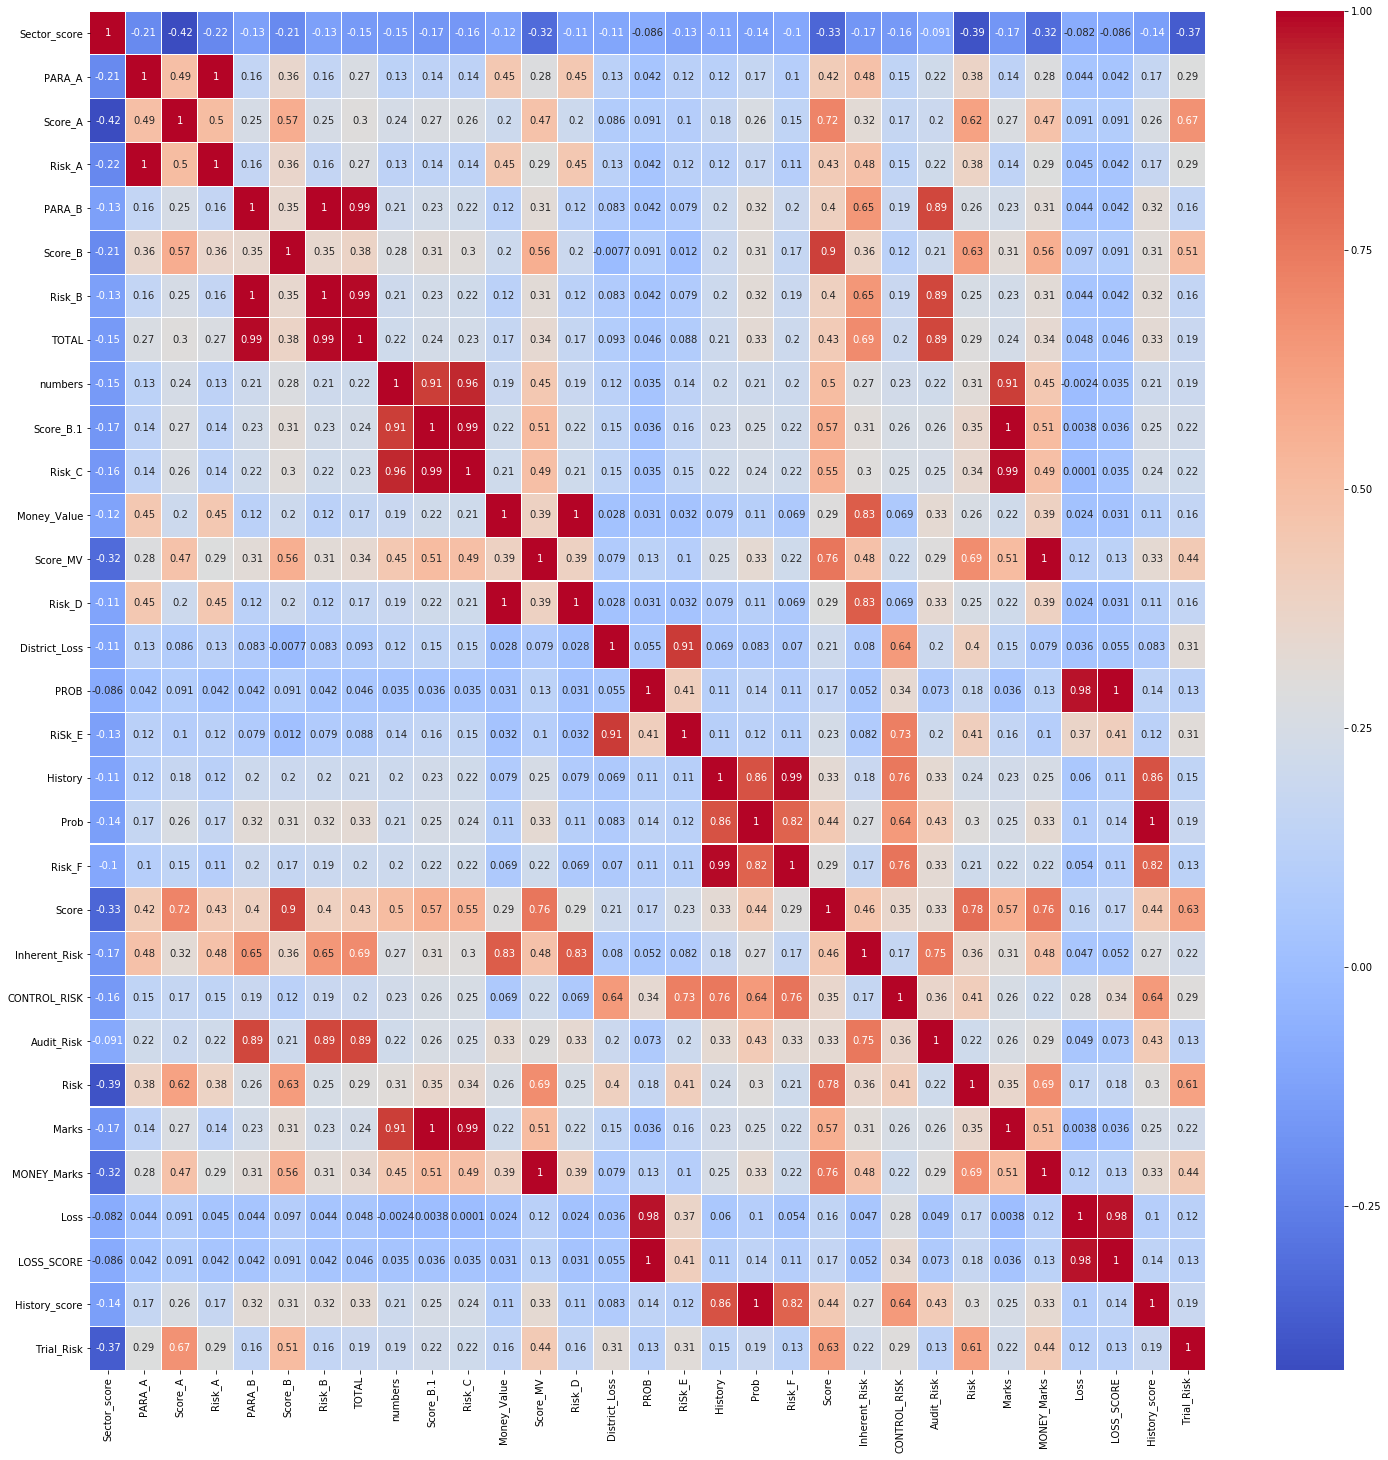

In [237]:
#Checking for corrilation in data

dc = data_cls.corr()
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(dc,annot=True,cmap='coolwarm',linewidths=0.1, ax=ax)

In [238]:
# Removing varibales which has correlation value higher than 90$

corr_matrix = data_cls.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [239]:
#Variables to drop 

to_drop


['Risk_A',
 'Risk_B',
 'TOTAL',
 'Score_B.1',
 'Risk_C',
 'Risk_D',
 'RiSk_E',
 'Risk_F',
 'Score',
 'Marks',
 'MONEY_Marks',
 'Loss',
 'LOSS_SCORE',
 'History_score']

In [240]:
data_cls = data_cls.drop(to_drop,axis=1)

In [241]:
data_cls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     760 non-null float64
LOCATION_ID      760 non-null object
PARA_A           760 non-null float64
Score_A          760 non-null float64
PARA_B           760 non-null float64
Score_B          760 non-null float64
numbers          760 non-null float64
Money_Value      760 non-null float64
Score_MV         760 non-null float64
District_Loss    760 non-null int64
PROB             760 non-null float64
History          760 non-null int64
Prob             760 non-null float64
Inherent_Risk    760 non-null float64
CONTROL_RISK     760 non-null float64
Audit_Risk       760 non-null float64
Risk             760 non-null int64
Trial_Risk       760 non-null int64
dtypes: float64(13), int64(4), object(1)
memory usage: 112.8+ KB


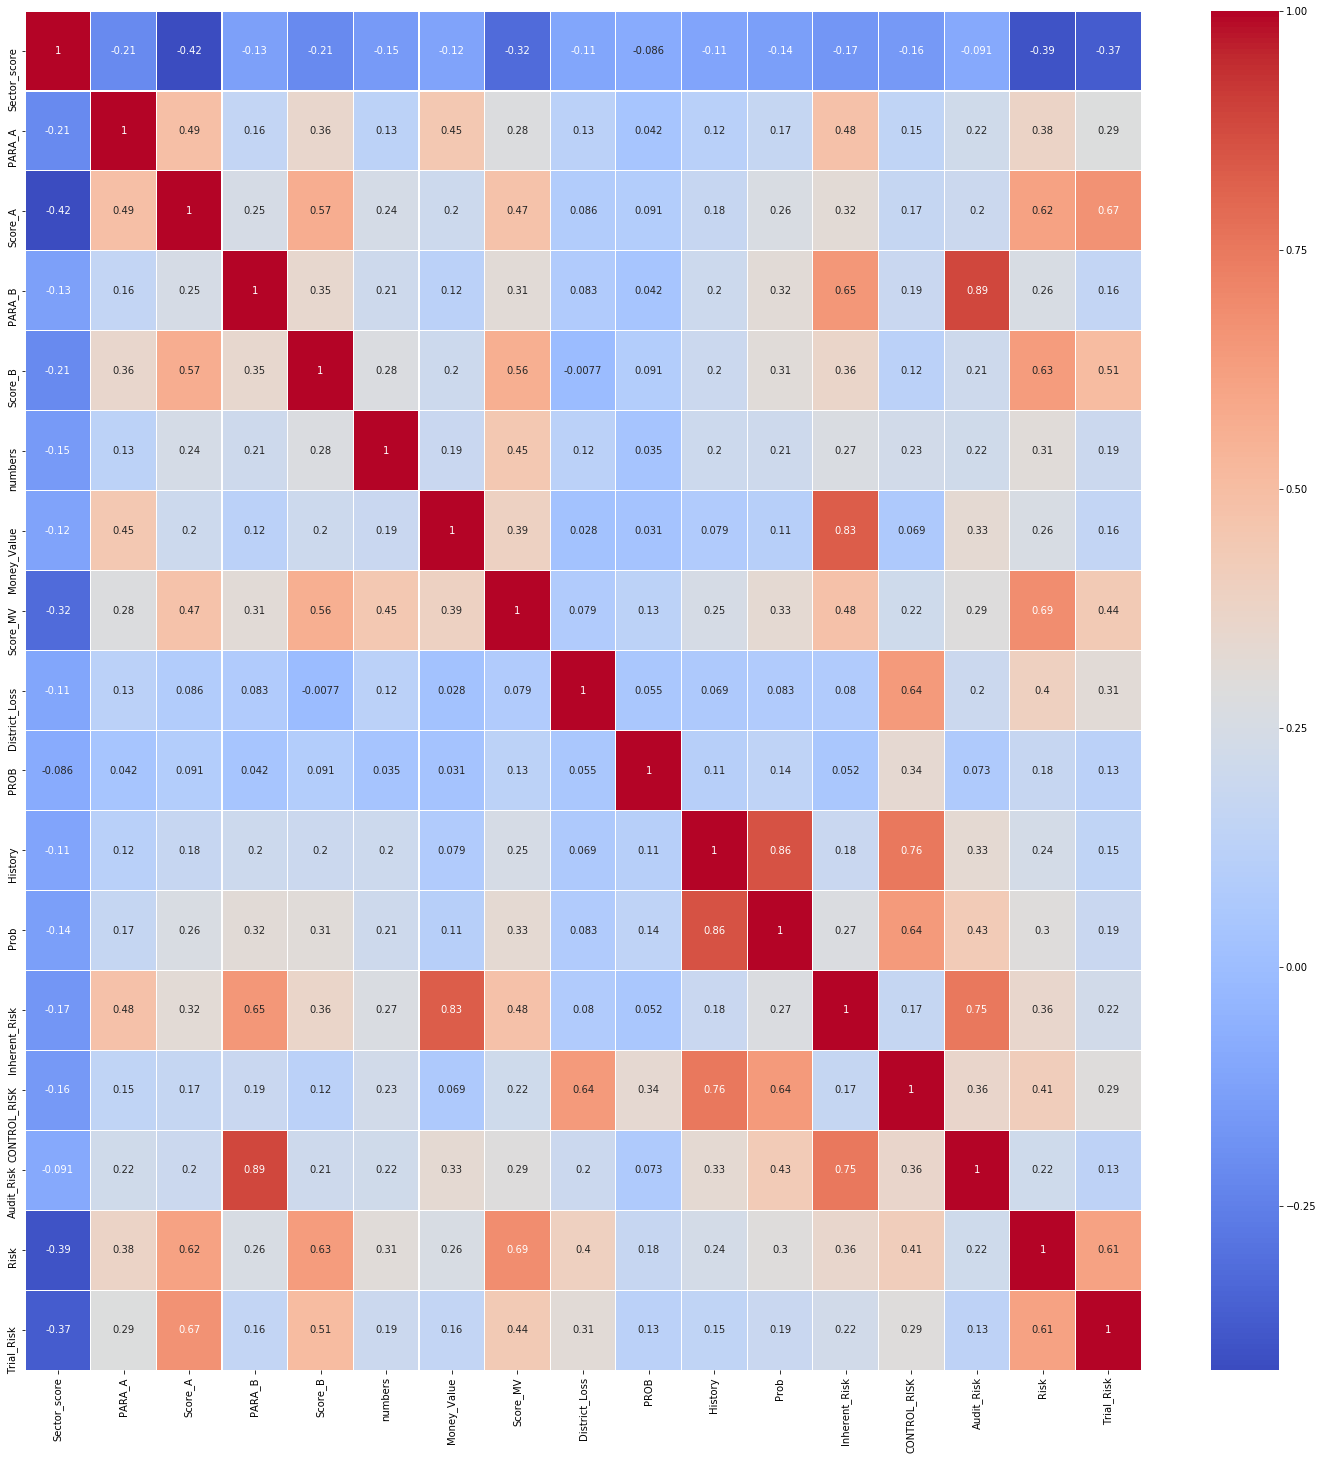

In [242]:
#Checking Correlation after droping those variables
dc = data_cls.corr()
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(dc,annot=True,cmap='coolwarm',linewidths=0.1, ax=ax)

In [243]:
data_cls['LOCATION_ID'] = data_cls['LOCATION_ID'].astype(float)

In [244]:
#Removing outliers with 3sigma rule

data_cls = data_cls[(np.abs(stats.zscore(data_cls)) < 3).all(axis=1)]
data_cls.shape

(701, 18)

In [245]:
#feature selection using VARIANCE INFLATION FACTOR

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

ck = add_constant(data_cls)
pd.Series([variance_inflation_factor(ck.values, i) 
               for i in range(ck.shape[1])], index=ck.columns)

Sector_score        1.325278
LOCATION_ID         1.064575
PARA_A             13.363565
Score_A             3.751671
PARA_B            417.070771
Score_B             2.912028
numbers             1.624057
Money_Value       661.157043
Score_MV            3.450841
District_Loss            inf
PROB                0.001053
History                  inf
Prob                     inf
Inherent_Risk    1530.451498
CONTROL_RISK             inf
Audit_Risk         10.330849
Risk                4.671239
Trial_Risk          2.607885
dtype: float64

In [246]:
#Removing varibales who has higher values
data_mod = data_cls.drop(['CONTROL_RISK','Prob','History','District_Loss','Inherent_Risk','Money_Value'],axis=1)

In [247]:
#Repeating VIF process

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

ck = add_constant(data_mod)
pd.Series([variance_inflation_factor(ck.values, i) 
               for i in range(ck.shape[1])], index=ck.columns)

Sector_score       1.292154
LOCATION_ID        1.063726
PARA_A             2.390377
Score_A            3.391598
PARA_B             2.700875
Score_B            2.544497
numbers            1.284081
Score_MV           2.697991
PROB            2396.828217
Audit_Risk         2.509770
Risk               2.758050
Trial_Risk         2.205348
dtype: float64

In [248]:
#Removing variables those has value greater than 10
data_mod = data_mod.drop(['PROB'],axis=1)

In [249]:
data_mod.groupby(['Risk','Trial_Risk']).count()

Sector_score  LOCATION_ID  PARA_A  Score_A  PARA_B  Score_B  \
Risk Trial_Risk                                                                
0    0                    275          275     275      275     275      275   
     1                    179          179     179      179     179      179   
1    1                    247          247     247      247     247      247   

                 numbers  Score_MV  Audit_Risk  
Risk Trial_Risk                                 
0    0               275       275         275  
     1               179       179         179  
1    1               247       247         247

# Selecting Evaluation Strategy

Calculated Accuracy and Confusion Matrix for each model ., 
As we know that if  there is uneven class distribution (large number of Actual Negatives) F1 score is a better matrix. We Selected F1 score as the Evaluation Strategy.

# CLASSIFICATION

In [250]:
X = data_mod.drop(['Audit_Risk','Risk','Trial_Risk'],axis = 1 )
y = data_mod['Trial_Risk']

In [251]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 775
Data columns (total 8 columns):
Sector_score    701 non-null float64
LOCATION_ID     701 non-null float64
PARA_A          701 non-null float64
Score_A         701 non-null float64
PARA_B          701 non-null float64
Score_B         701 non-null float64
numbers         701 non-null float64
Score_MV        701 non-null float64
dtypes: float64(8)
memory usage: 49.3 KB


In [252]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# 1.KNN Classifier

In [253]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

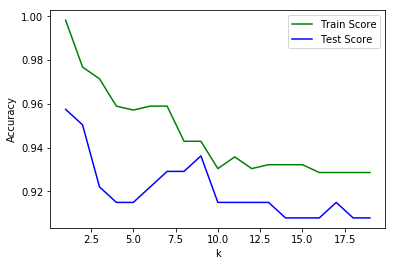

In [254]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [255]:
knn = KNeighborsClassifier(9)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9428571428571428
0.9361702127659575


In [256]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.93617021 0.94680851 0.92473118 0.93548387 0.92473118 0.91397849]
0.9303172424311752


In [257]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
knn = KNeighborsClassifier(9)
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[62  8]
 [ 1 70]]
0.9395973154362417


# Summary for Knn Classifer

train score :0.9428571428571428

test score :0.9361702127659575

Average cross validation score:0.9303172424311752

Best Parameter : number of neighbors = 9


F1 Score = 0.9395973154362417

# 2.Decision Tree

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)


In [259]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,15):
    dtree = DecisionTreeClassifier(max_depth=i, random_state=0)
    dtree.fit(X_train, y_train)
    train= dtree.score(X_train, y_train)
    test = dtree.score(X_test, y_test)
    print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.848
Accuracy on test set: 0.851
Accuracy on training set: 0.920
Accuracy on test set: 0.879
Accuracy on training set: 0.945
Accuracy on test set: 0.929
Accuracy on training set: 0.948
Accuracy on test set: 0.936
Accuracy on training set: 0.955
Accuracy on test set: 0.936
Accuracy on training set: 0.959
Accuracy on test set: 0.936
Accuracy on training set: 0.961
Accuracy on test set: 0.943
Accuracy on training set: 0.966
Accuracy on test set: 0.950
Accuracy on training set: 0.977
Accuracy on test set: 0.943
Accuracy on training set: 0.979
Accuracy on test set: 0.943
Accuracy on training set: 0.984
Accuracy on test set: 0.950
Accuracy on training set: 0.989
Accuracy on test set: 0.950
Accuracy on training set: 0.996
Accuracy on test set: 0.950
Accuracy on training set: 0.998
Accuracy on test set: 0.943


In [260]:
feat_importance=dtree.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [0.02775639 0.03488156 0.2639904  0.         0.01756879 0.08498698
 0.00582001 0.03372036]


In [261]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(max_depth=11, random_state=0)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(dtree , X_train, y_train, cv=kfold)))
scores = cross_val_score(dtree , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.93617021 0.96808511 0.93548387 0.91397849 0.96774194 0.94623656]
0.9446160298939984


In [262]:
from sklearn.metrics import f1_score
dtree = DecisionTreeClassifier(max_depth=11, random_state=0)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
cm = confusion_matrix(ypred,y_test)
ft = f1_score(ypred,y_test)
print(cm)
print(ft)

[[62  6]
 [ 1 72]]
0.9536423841059603


# Summary for Decision Tree

train score :0.984

test score :0.95

Average cross validation score:0.944

Best Parameter : max_depth = 11


F1 Score = 0.954

# 3.logistic Regression

In [263]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [264]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

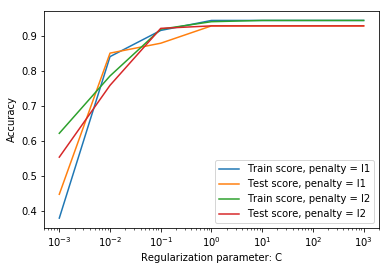

In [265]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [266]:
log_l2 = LogisticRegression(penalty = 'l2', C = 1)
#log_l1.fit(X_train, y_train)
log_l2.fit(X_train, y_train)
print(log_l2.score(X_train, y_train))
#test_score_l1.append(log_l1.score(X_test, y_test))
print(log_l2.score(X_test, y_test))

0.9410714285714286
0.9290780141843972


In [267]:
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
log_l1.fit(X_train, y_train)
#log_l2.fit(X_train, y_train)
print(log_l1.score(X_train, y_train))
#test_score_l1.append(log_l1.score(X_test, y_test))
print(log_l1.score(X_test, y_test))

0.9446428571428571
0.9290780141843972


In [268]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [269]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.94


In [270]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1 , X_train, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.95744681 0.94680851 0.94623656 0.93548387 0.93548387 0.92473118]
0.9410318005033173


In [271]:
from sklearn.metrics import f1_score
log_l1 = LogisticRegression(penalty = 'l1', C = 10)
log_l1.fit(X_train, y_train)
ypred = log_l1.predict(X_test)
ft = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

0.9315068493150686
[[63 10]
 [ 0 68]]


# Summary for Logistic Regression

train score :0.944

test score :0.93

Average cross validation score:0.94

Best Parameter : penality = l1 , c=10


F1 Score = 0.93

# 4.Linear svc

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [273]:
from sklearn.svm import SVC

train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svc = SVC(kernel = 'linear', C = C)
        
        #train the model
        svc.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train, y_train))
        test.append(svc.score(X_test, y_test))
        index.append((C))

In [274]:
print(train)
print(test)

[0.6838095238095238, 0.819047619047619, 0.8895238095238095, 0.9276190476190476, 0.9428571428571428, 0.9428571428571428]
[0.6647727272727273, 0.75, 0.8125, 0.8863636363636364, 0.9375, 0.9375]


In [275]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'linear')

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [276]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.94


In [277]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'linear',C = 10)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.95454545 0.95454545 0.93181818 0.93103448 0.94252874 0.94252874]
0.9428335074886798


In [278]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'linear', C = 10 )
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[78 11]
 [ 0 87]]
0.9405405405405405


#  Summary for Linear Svc

train score :0.944

test score :0.9375

Average cross validation score:0.94

Best Parameter :  c=10


F1 Score = 0.94

# 5.SVC with kernel


In [279]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [280]:
from sklearn.svm import SVC

train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
    for gamma in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svc = SVC(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train, y_train))
        test.append(svc.score(X_test, y_test))
        index.append((C,gamma))

([<matplotlib.axis.XTick at 0x2226e7a6748>,
 <a list of 36 Text xticklabel objects>)

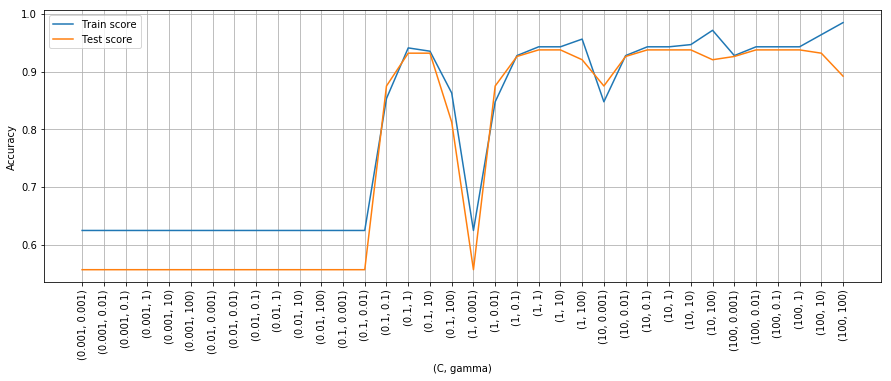

In [281]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(range(len(index)), train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.legend()
plt.grid()
plt.xlabel('(C, gamma)')
plt.ylabel('Accuracy')
plt.xticks(range(len(index)), index, rotation = 90)

In [282]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'rbf')

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [283]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.89


In [284]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc1 = SVC(kernel = 'rbf',C = 100,gamma = 0.01)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc1 , X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.95454545 0.95454545 0.93181818 0.93103448 0.94252874 0.94252874]
0.9428335074886798


In [285]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'rbf', C = 100 , gamma = 0.01)
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)


[[78 11]
 [ 0 87]]
0.9405405405405405


#  Summary for  Svc with Kernal (rbf)

train score :0.94

test score :0.93

Average cross validation score:0.94

Best Parameter :  c=100, gamma = 0.01


F1 Score = 0.94

# 6.Naive bayes

In [286]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [287]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [288]:
print(gnb.score(X_train,y_train))
print(gnb.score(X_test,y_test))

0.9428571428571428
0.9318181818181818


In [289]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(gnb, X_train, y_train, cv=kfold)))
scores = cross_val_score(gnb, X_train, y_train, cv=kfold)
print(scores.mean())

Cross-validation scores:
[0.95454545 0.95454545 0.93181818 0.93103448 0.94252874 0.94252874]
0.9428335074886798


In [290]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
ypred = gnb.predict(X_test)

auc = accuracy_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(auc)
print(cm)
print(f)

0.9318181818181818
[[77 11]
 [ 1 87]]
0.935483870967742


#  Summary for  Svc with Kernal (rbf)

train score :0.94

test score :0.93

Average cross validation score:0.94

Best Parameter :  No parameters

F1 Score = 0.935

# Summary

With the F1 scores., The Best model for this Data is Decision Tree